# Linear Regression



## The problem

Linear regression assumes that the predictor function is:

$$\hat{y} = \mathbf{w}^\top \cdot \phi(\mathbf{x}) $$

With the basis function $\phi$ equal to the identity function: 

$$\hat{y} = \mathbf{w}^\top \cdot \mathbf{x} $$

defined by parameters $\mathbf{w}$.

Given the data $D = \{(\mathbf{x_i}, y_i)\}_{i=1}^m$, we can compute the performance of an hypothesis with the Mean Square Error:

$$MSE_D = \frac{1}{m} \sum_i (\hat{y} - y)  $$

## Closed-form solution

$$\min MSE_D \implies \nabla_{\mathbf{w}} MSE_D = 0$$

$$ \implies $$

$$ \mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1}  \mathbf{X}^T \mathbf{y} $$


## Probabilistic interpretation (conditional log-likelihood maximization)

If we put the problem if linear regression in term of maximum likelihood estimation, that is, assuming the data are distributed as:

- $p(y | x) = \mathcal{N}(y; \hat{y}(\mathbf{w},\mathbf{x}), \sigma^2)$

We have that:

- MSE minimization $\equiv$ log-likelihood maximization

Indeed:
$$
\begin{align}
\mathbf{w}_{ML} &= \arg\max_\mathbf{w} p(Y | \mathbf{X}; \mathbf{w}) \\
&= \arg\max_\mathbf{w} \prod_i p(y_i | \mathbf{x_i}; \mathbf{w}) \\
&= \arg\max_\mathbf{w} \sum_i\log p(y_i | \mathbf{x_i}; \mathbf{w}) \\
&= \arg\max_\mathbf{w} - ... - ... - \sum_i \frac{||\hat{y}_i - y_i||^2}{2\sigma^2}
\end{align}
$$

## Bayesian LR

Adding a prior over the parameters and doing MAP estimation is equivalent to common regularization technique (e.g. Lasso/Ridge regression), when the prior is distributed as Gaussian or Laplacian, respectively.

## Univariate Linear Regression

[Gradient Descent based](#Gradient-Descent-based)  
[Closed form](#Closed-form)  
[Using Sklearn](#Using-sklearn)  
[Using Tensorflow](#Using-sklearn)

### Gradient Descent based
 

(20, 2) (20, 1)


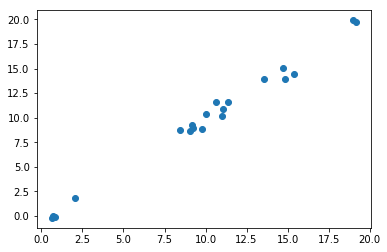

In [83]:
import numpy as np
import matplotlib.pyplot as plt


def generate_linear_data(w, N):
    """generate data"""
    x = np.random.uniform(low=0, high=20, size=(N, 1))
    # one column of ones for the bias
    x = np.hstack([np.ones((N, 1)), x])
    # linear data with uniform error
    y = x.dot(w) + (2 * np.random.random(N) -1)
    y = y.reshape((N, 1))
    return x, y


x, y = generate_linear_data(np.array([0, 1]), 20)
print(x.shape, y.shape)
plt.scatter(x[:, 1], y)
plt.show()

In [84]:
# our hypothesis
def hypothesis(w):
    """In this case, our hypothesis is a line"""
    return lambda x: x.dot(w)


def cost(w, x, y):
    # Mean squared error
    N = len(x)
    h = hypothesis(w)
    hx = h(x).reshape(y.shape)
    # print(x.shape, y.shape)
    # print("h(x)", h(x).shape)
    # print("np.square(h(x)-y)", (h_x -y).shape)
    # print(np.sum(np.square(h(x)-y)))
    return 1/(2*N) * np.sum(np.square(hx-y))


def cost_derivative(w, x, y):
    N = len(x)
    h = hypothesis(w)
    hx = h(x).reshape(y.shape)
    s = (hx-y)*x
    # print(hx.shape)
    # print(s.shape)
    return 1/N * np.sum(s, axis=0)

In [85]:
# find parameters that minimize the cost function: Gradient Descent


def gradient_descent(x, y, alpha=0.01, num_steps=1000):
    """Given data, return two parameters, a and b, for the best fit"""
    w = np.random.random(2)
    
    for i in range(num_steps):
        c = cost(w, x, y)
        new_w = w - alpha * cost_derivative(w, x, y)
        if i % 1000 == 0: 
            print("Iteration:\t", i, "\tcost:\t", c, "\tweights:\t", w)
        w = new_w
    return w

In [86]:
w = gradient_descent(x,y, alpha=0.01, num_steps=10000)
print("Final weights:", w)

Iteration:	 0 	cost:	 0.3608710763426947 	weights:	 [0.58205048 0.93574791]
Iteration:	 1000 	cost:	 0.14558593207384032 	weights:	 [-0.58978805  1.04555045]
Iteration:	 2000 	cost:	 0.14339522427617102 	weights:	 [-0.7152264   1.05526208]
Iteration:	 3000 	cost:	 0.1433701849821347 	weights:	 [-0.72863703  1.05630035]
Iteration:	 4000 	cost:	 0.143369898788674 	weights:	 [-0.73007077  1.05641136]
Iteration:	 5000 	cost:	 0.1433698955175477 	weights:	 [-0.73022405  1.05642322]
Iteration:	 6000 	cost:	 0.1433698954801592 	weights:	 [-0.73024043  1.05642449]
Iteration:	 7000 	cost:	 0.14336989547973206 	weights:	 [-0.73024219  1.05642463]
Iteration:	 8000 	cost:	 0.14336989547972723 	weights:	 [-0.73024237  1.05642464]
Iteration:	 9000 	cost:	 0.14336989547972698 	weights:	 [-0.73024239  1.05642464]
Final weights: [-0.7302424   1.05642464]


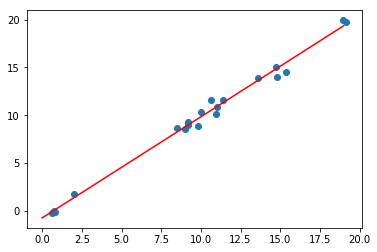

In [87]:
x_arr = np.arange(20).reshape((20, 1))
x_arr = np.hstack([np.ones((20, 1)), x_arr])
y_arr = hypothesis(w)(x_arr)

plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.show()

### Closed-form

Closed-form weights: [-0.7302424   1.05642464]


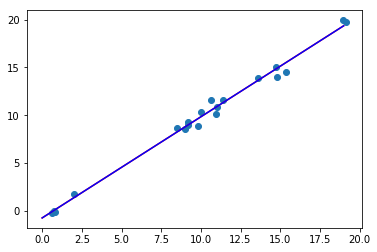

In [88]:
w_closed_form = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y).reshape(w.size)
print("Closed-form weights:", w_closed_form)
y_closed_form = hypothesis(w_closed_form)(x_arr)

plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.plot(x_arr[:, 1], y_closed_form, c="b")
plt.show()

### Using Sklearn

[[0.         1.05642464]]


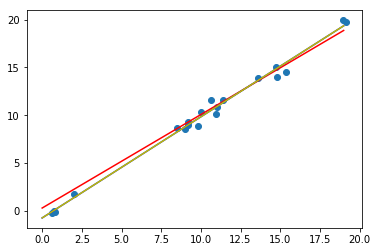

In [92]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
y_sklearn = model.predict(x_arr)
print(model.coef_)
plt.scatter(x[:, 1], y)
plt.plot(x_arr[:, 1], y_arr, c="r")
plt.plot(x_arr[:, 1], y_closed_form, c="b")
plt.plot(x_arr[:, 1], y_sklearn, c="y")
plt.show()

### Using Tensorflow

Initial weights:  [0.77391386 0.02364945]
60.336987 weights:  [0.79162663 0.26157197]


0.7957499 weights:  [0.77496064 0.93988955]
0.75224227 weights:  [0.70919544 0.94498116]


0.7124538 weights:  [0.6463033 0.9498504]
0.6760658 weights:  [0.58615917 0.9545068 ]


0.64278793 weights:  [0.52864265 0.9589599 ]
0.6123547 weights:  [0.47363925 0.9632183 ]


0.5845228 weights:  [0.42103916 0.96729064]
0.55906963 weights:  [0.37073722 0.97118515]


0.535792 weights:  [0.3226331 0.9749094]
final loss:  0.51470786 weights:  [0.27708077 0.9784362 ]


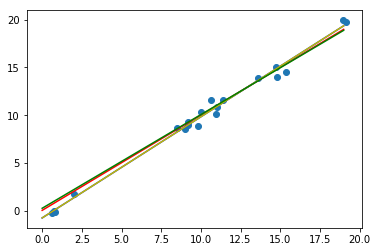

In [94]:
import tensorflow as tf

N = len(x)
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform((2, )), name="weights", expected_shape=(2, ))

Y_Pred = tf.reshape(tf.tensordot(X, W, 1), (N, 1))
error = tf.square(Y_Pred - Y)
f_error = tf.reduce_sum(error)/len(x)  # + tf.norm(W)
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(f_error)

epochs = 1000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Initial weights: ", W.eval())
    
    loss_expected = 0
    for i in range(epochs):
        
        sess.run(optimizer, {X: x, Y: y})
        
        loss_per_epoch = sess.run(f_error, {X: x, Y: y})
        
        # Allow the training to quit if we've reached a minimum
        if np.abs(loss_expected - loss_per_epoch) < 0.0000001:
            break
        loss_expected = loss_per_epoch
        
        if i%100==0:
            print(loss_expected, "weights: ", W.eval(session=sess))

    print("final loss: ", loss_expected, "weights: ", W.eval(session=sess))
    y_tensorflow = Y_Pred.eval(feed_dict={X: x_arr}, session=sess)
    plt.figure()
    plt.scatter(x[:, 1], y)
    plt.plot(x_arr[:, 1], y_arr, c="r")
    plt.plot(x_arr[:, 1], y_closed_form, c="b")
    plt.plot(x_arr[:, 1], y_sklearn, c="y")
    plt.plot(x_arr[:, 1], y_tensorflow, c="g")
    plt.show()
    


## References

- [Chapter 5 of deeplearningbook.org](http://www.deeplearningbook.org/contents/ml.html)